<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

In [289]:
# Parametersh5_name = '{PATH_1}'protosp_path = '{PATH_2}'library = "CRISPR-DMSO1"tsv_path = '{PATH_3}'

In [290]:
library(Seurat)
library(SeuratDisk)
library(dplyr)
library(ggplot2)
library(patchwork)
library(stringr)
library(crayon)

In [291]:
#setwd("~/prj/catatac/scripts")

# Load guide-capture data

Define paths etc

In [292]:
# Pass these as parameters# h5_name = '{PATH_4}'# protosp_path = '{PATH_5}'# library = "CRISPR8"# tsv_path = '{PATH_6}'

In [293]:
h5_w_gcap_name <- sub(".h5seurat", "_w_GUIDE_CAP.h5seurat", h5_name)barcode2guide_tsv_path <- paste0(tsv_path, '{PATH_7}')tsv_name <- paste0(tsv_path, '{PATH_8}')

### Load protospacer file

In [294]:
df_protosp = read.table(protosp_path, header=TRUE, comment.char="")

In [295]:
tfs_w_ntctl    = unique(df_protosp$X.TargetGene)
unselect_ntctl = (tfs_w_ntctl != "NTCTL") & (tfs_w_ntctl != "NTCTRL")
tfs_to_plot    = tfs_w_ntctl[unselect_ntctl]

guides_to_plot  = df_protosp$GuideName
tfs_to_plot
guides_to_plot

[1] "ADNP"    "CHD2"    "CNOT2"   "GPBP1L1" "HIC2"    "MNT"     "NTC28"  
 [8] "NTC36"   "NTC74"   "NTC82"   "PIAS1"   "PLAGL2"  "SLTM"    "TSC22D4"
[15] "ZBED6"   "ZNF669"

[1] "ADNP_1"    "CHD2_1"    "CNOT2_2"   "GPBP1L1_1" "HIC2_1"    "MNT_1"    
 [7] "NTC28_2"   "NTC36_1"   "NTC74_1"   "NTC74_2"   "NTC82_1"   "PIAS1_1"  
[13] "PIAS1_2"   "PLAGL2_1"  "SLTM_1"    "TSC22D4_1" "ZBED6_1"   "ZNF669_2"

In [296]:
df_protosp

X.TargetGene,GuideName,value
<chr>,<chr>,<chr>
ADNP,ADNP_1,CACCCTCTCCGCCGAAGTG
CHD2,CHD2_1,GCAGAGCGCGCTCTCTCTA
CNOT2,CNOT2_2,CGGGACAAGAAAATTCATG
GPBP1L1,GPBP1L1_1,GGCCCACAAGGTCCAGGAG
HIC2,HIC2_1,TCGGCCCGCGACTCCTGTT
MNT,MNT_1,GCGGGGGCGTACTACACCG
NTC28,NTC28_2,GCGCTAGGAAACCAACAAGG
NTC36,NTC36_1,GCAGCGAGCAGCTTTTACGA
NTC74,NTC74_1,GGGTGGGTCACGCGGAAGGG


In [297]:
#c("OTP", "MYF6", "MEIS1", "FLI1", "HHEX", "HOXA6", "ELF5", "GBX1", "DPRX", "NTCTL")
##!! tf_list   <- tfs_w_ntctl 

df_guide <- read.table(tsv_name, header = TRUE, sep = "\t", quote = "")
tf_list  <- intersect(guides_to_plot, colnames(df_guide))

guide_counts  <- t(data.matrix(df_guide[,tf_list]))
colnames(guide_counts) <- df_guide$barcode_dash
guide_counts

,AAACAGCCAAAGCGGC-1,AAACAGCCAAATATCC-1,AAACAGCCAACACCTA-1,AAACAGCCAACATAAG-1,AAACAGCCAACCTGGT-1,AAACAGCCAACTAACT-1,AAACAGCCAACTAGAA-1,AAACAGCCAACTCGCG-1,AAACAGCCAACTGGGA-1,AAACAGCCAAGACTCC-1,⋯,TTTGTTGGTTTAAAGC-1,TTTGTTGGTTTAGCGA-1,TTTGTTGGTTTAGTCC-1,TTTGTTGGTTTATCTG-1,TTTGTTGGTTTGACCT-1,TTTGTTGGTTTGCGCC-1,TTTGTTGGTTTGGGCG-1,TTTGTTGGTTTGGGTA-1,TTTGTTGGTTTGTGGA-1,TTTGTTGGTTTGTTGC-1
ADNP_1,0,64,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0
CHD2_1,0,0,0,0,0,0,0,11,0,0,⋯,0,0,0,0,0,0,125,0,0,0
CNOT2_2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
GPBP1L1_1,0,0,0,1,0,0,0,0,0,36,⋯,0,0,47,0,86,0,103,0,0,0
HIC2_1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,63,0,0,0,0,0
MNT_1,200,0,0,1,0,0,0,6,0,66,⋯,0,0,0,0,0,58,1,0,0,1
NTC28_2,38,0,0,0,0,0,0,35,0,0,⋯,45,0,0,0,0,0,0,0,0,0
NTC36_1,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,47,18,0,0,0
NTC74_1,0,0,0,0,3,0,0,0,0,0,⋯,0,0,0,0,0,42,0,0,0,0
NTC74_2,0,0,0,0,3,0,0,0,0,0,⋯,20,0,0,1,3,0,45,0,0,0


Get overlapping cells

In [298]:
N_MIN_GUIDES <- 10
select_overlapping   <-
    df_guide$in_multiome & (df_guide$n_guides >= N_MIN_GUIDES)

overlapping_barcodes <- df_guide[select_overlapping, ]$barcode_dash
overlapping_barcodes <- as.vector(overlapping_barcodes)

overlapping_guide_counts <- guide_counts[, overlapping_barcodes]

n_all_overlapping <- nrow(df_guide[df_guide$in_multiome, ])
paste("Overlapping barcodes w/ min guides =", N_MIN_GUIDES,": ", length(overlapping_barcodes))
paste("Overlapping barcodes w/ min guides =", 1,": ", n_all_overlapping)


[1] "Overlapping barcodes w/ min guides = 10 :  6819"

[1] "Overlapping barcodes w/ min guides = 1 :  6821"

In [299]:
head(overlapping_guide_counts)

,AAACAGCCAAATATCC-1,AAACAGCCACGCAACT-1,AAACAGCCATGTTGGC-1,AAACATGCAAGGTAAC-1,AAACATGCAATTTAGC-1,AAACATGCACTTCATC-1,AAACATGCAGCATGTC-1,AAACCAACAATAGCCC-1,AAACCAACAATATACC-1,AAACCGAAGCGCCTTT-1,⋯,TTTGTGAAGTAAGGGC-1,TTTGTGAAGTATCGCG-1,TTTGTGGCACATAACT-1,TTTGTGGCAGCGCTTG-1,TTTGTGGCAGGATTAA-1,TTTGTGGCATCTTGAG-1,TTTGTGTTCCTCCATA-1,TTTGTGTTCGAAGCGG-1,TTTGTTGGTCACGAAC-1,TTTGTTGGTCCTTCAG-1
ADNP_1,64,0,0,0,0,0,0,9,0,0,⋯,58,30,0,0,0,0,0,0,0,0
CHD2_1,0,0,0,56,63,0,37,62,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CNOT2_2,0,67,0,25,0,0,0,0,0,0,⋯,0,0,46,0,0,69,0,0,0,18
GPBP1L1_1,0,0,0,0,0,30,0,0,0,0,⋯,0,95,0,0,0,24,0,66,0,0
HIC2_1,0,0,58,0,0,0,1156,0,35,0,⋯,33,0,0,1411,0,0,29,0,0,33
MNT_1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,79,0,0,0,0,0,0,0


In [300]:
head(overlapping_barcodes)

[1] "AAACAGCCAAATATCC-1" "AAACAGCCACGCAACT-1" "AAACAGCCATGTTGGC-1"
[4] "AAACATGCAAGGTAAC-1" "AAACATGCAATTTAGC-1" "AAACATGCACTTCATC-1"

## Plot stats

Mean #guides per cell 1250.924

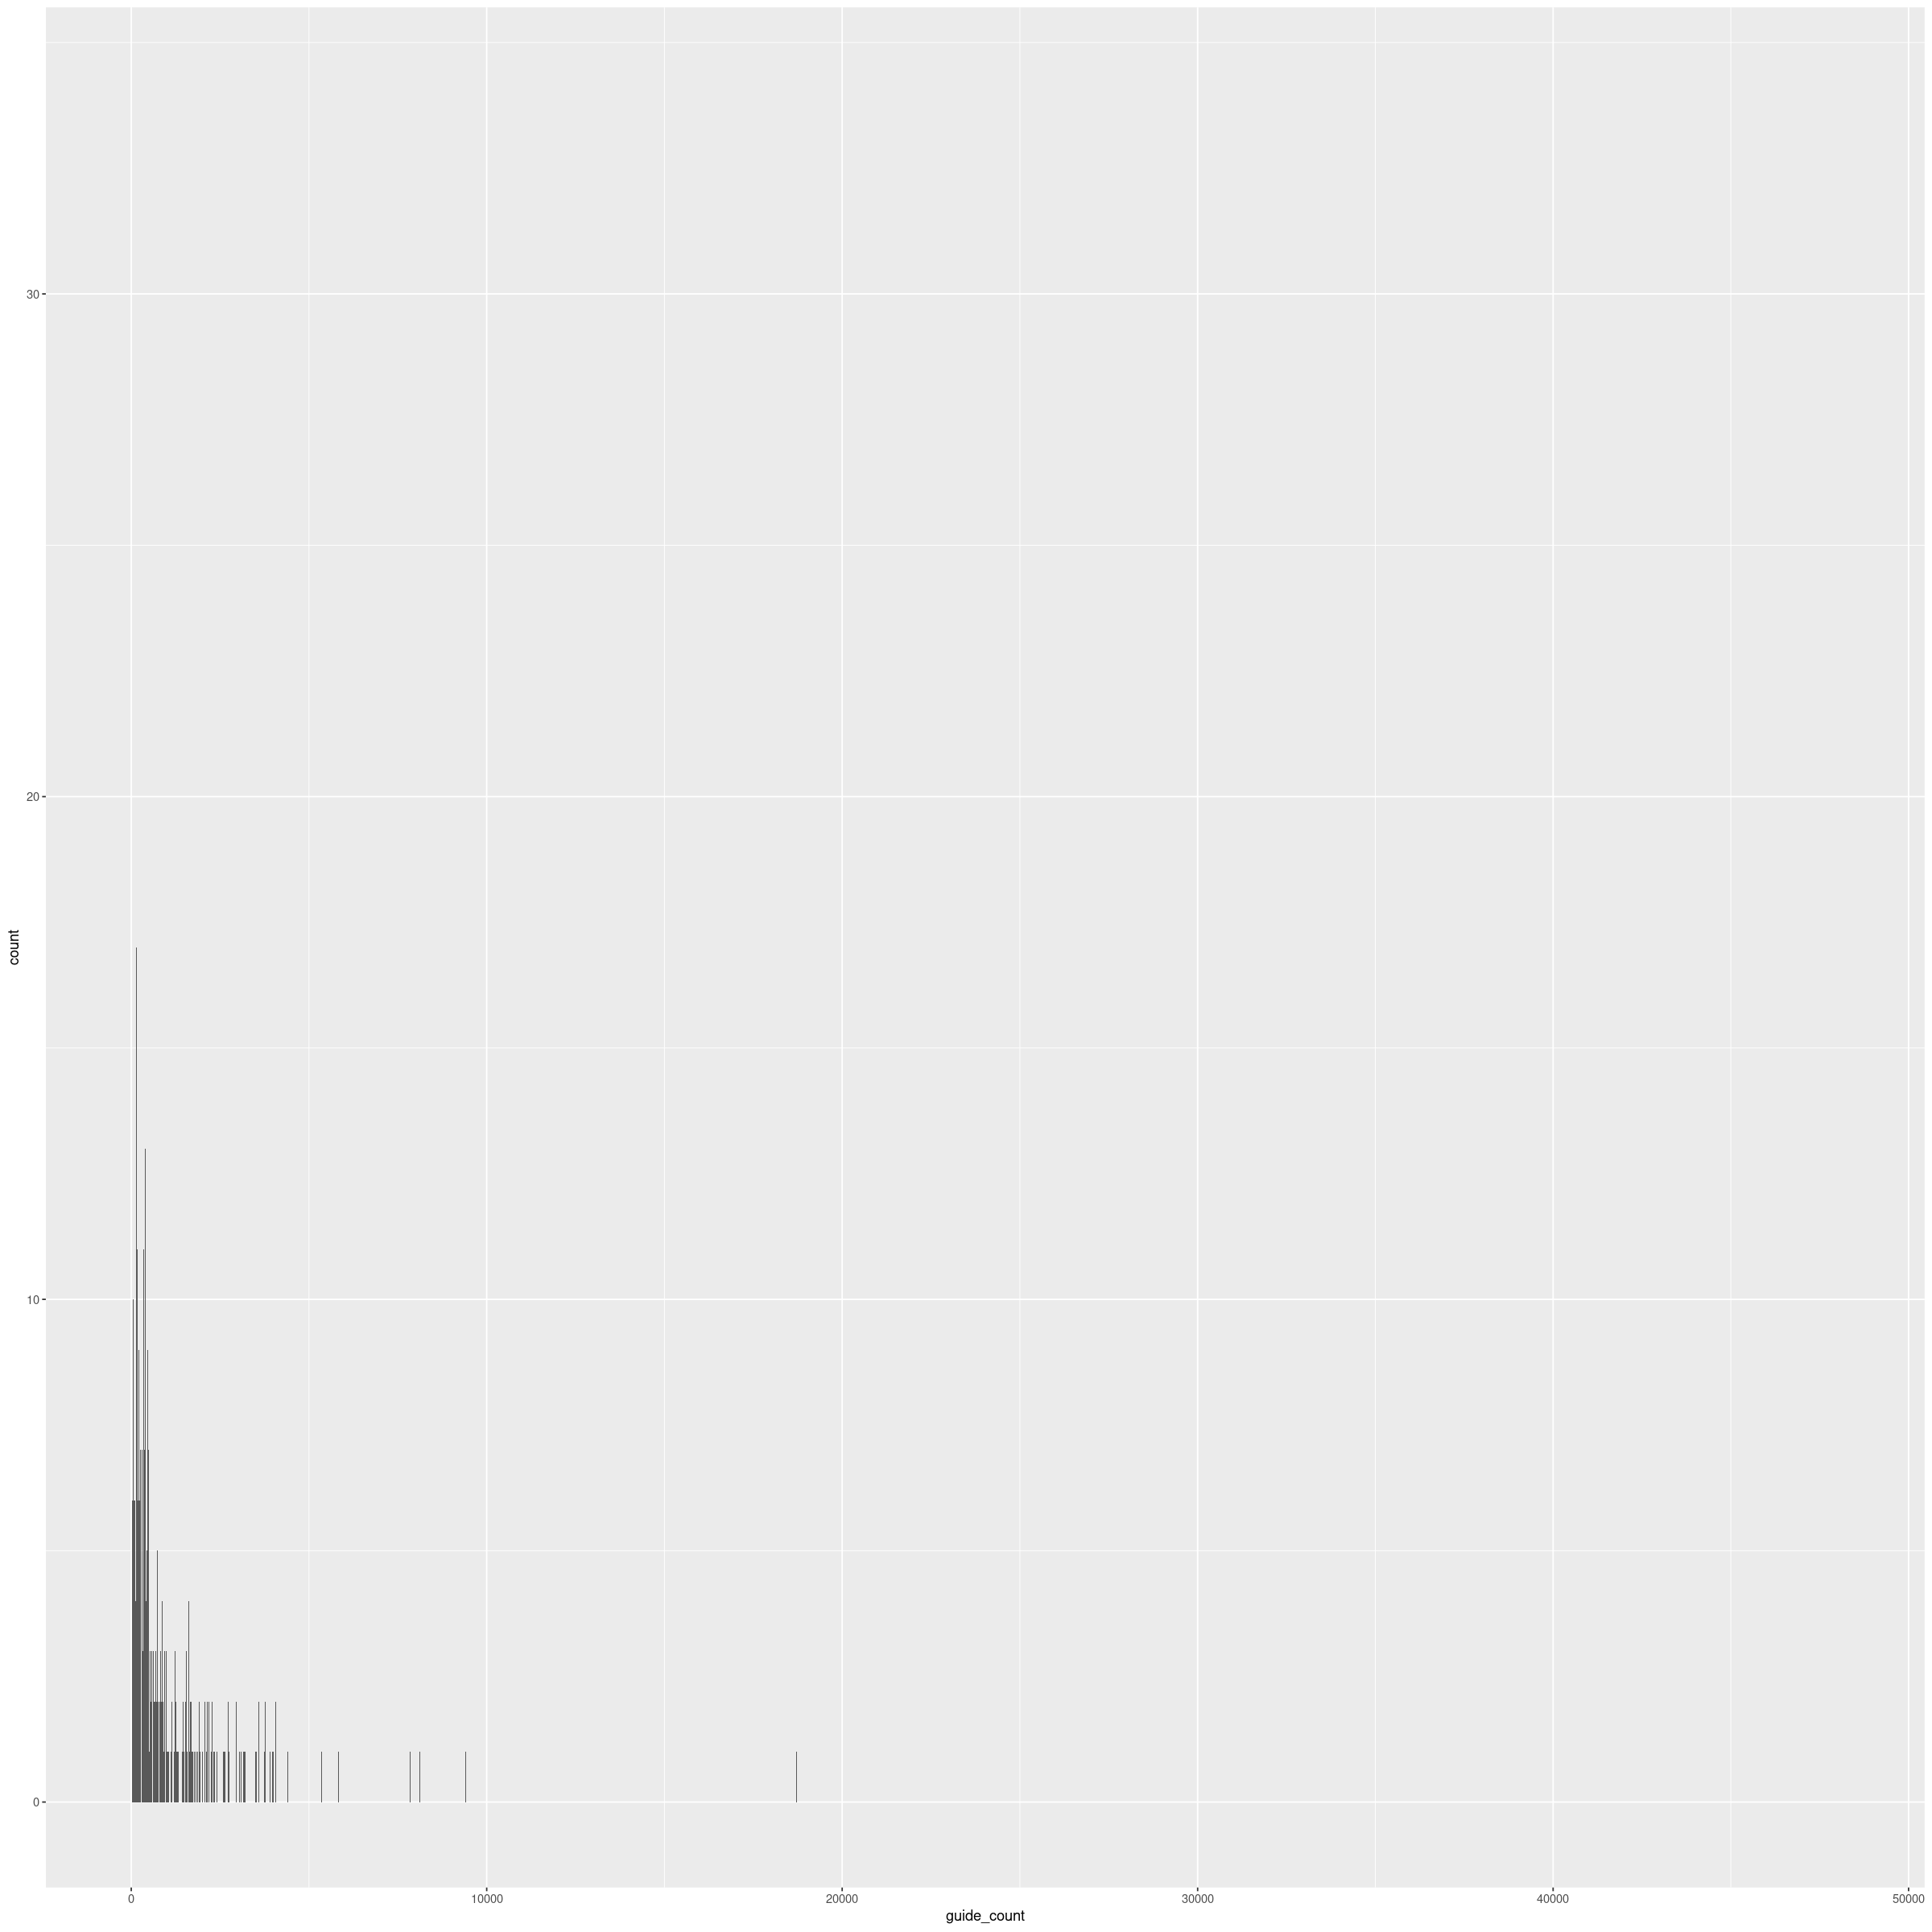

In [301]:
df_guide_counts_per_cell <- data.frame(guide_count=colSums(overlapping_guide_counts))
mean_guides_per_cell = mean(df_guide_counts_per_cell$guide_count)
cat(blue("Mean #guides per cell"), mean_guides_per_cell)

ggplot(df_guide_counts_per_cell, aes(x=guide_count)) +
    geom_histogram(binwidth=1)

No id variables; using all as measure variables



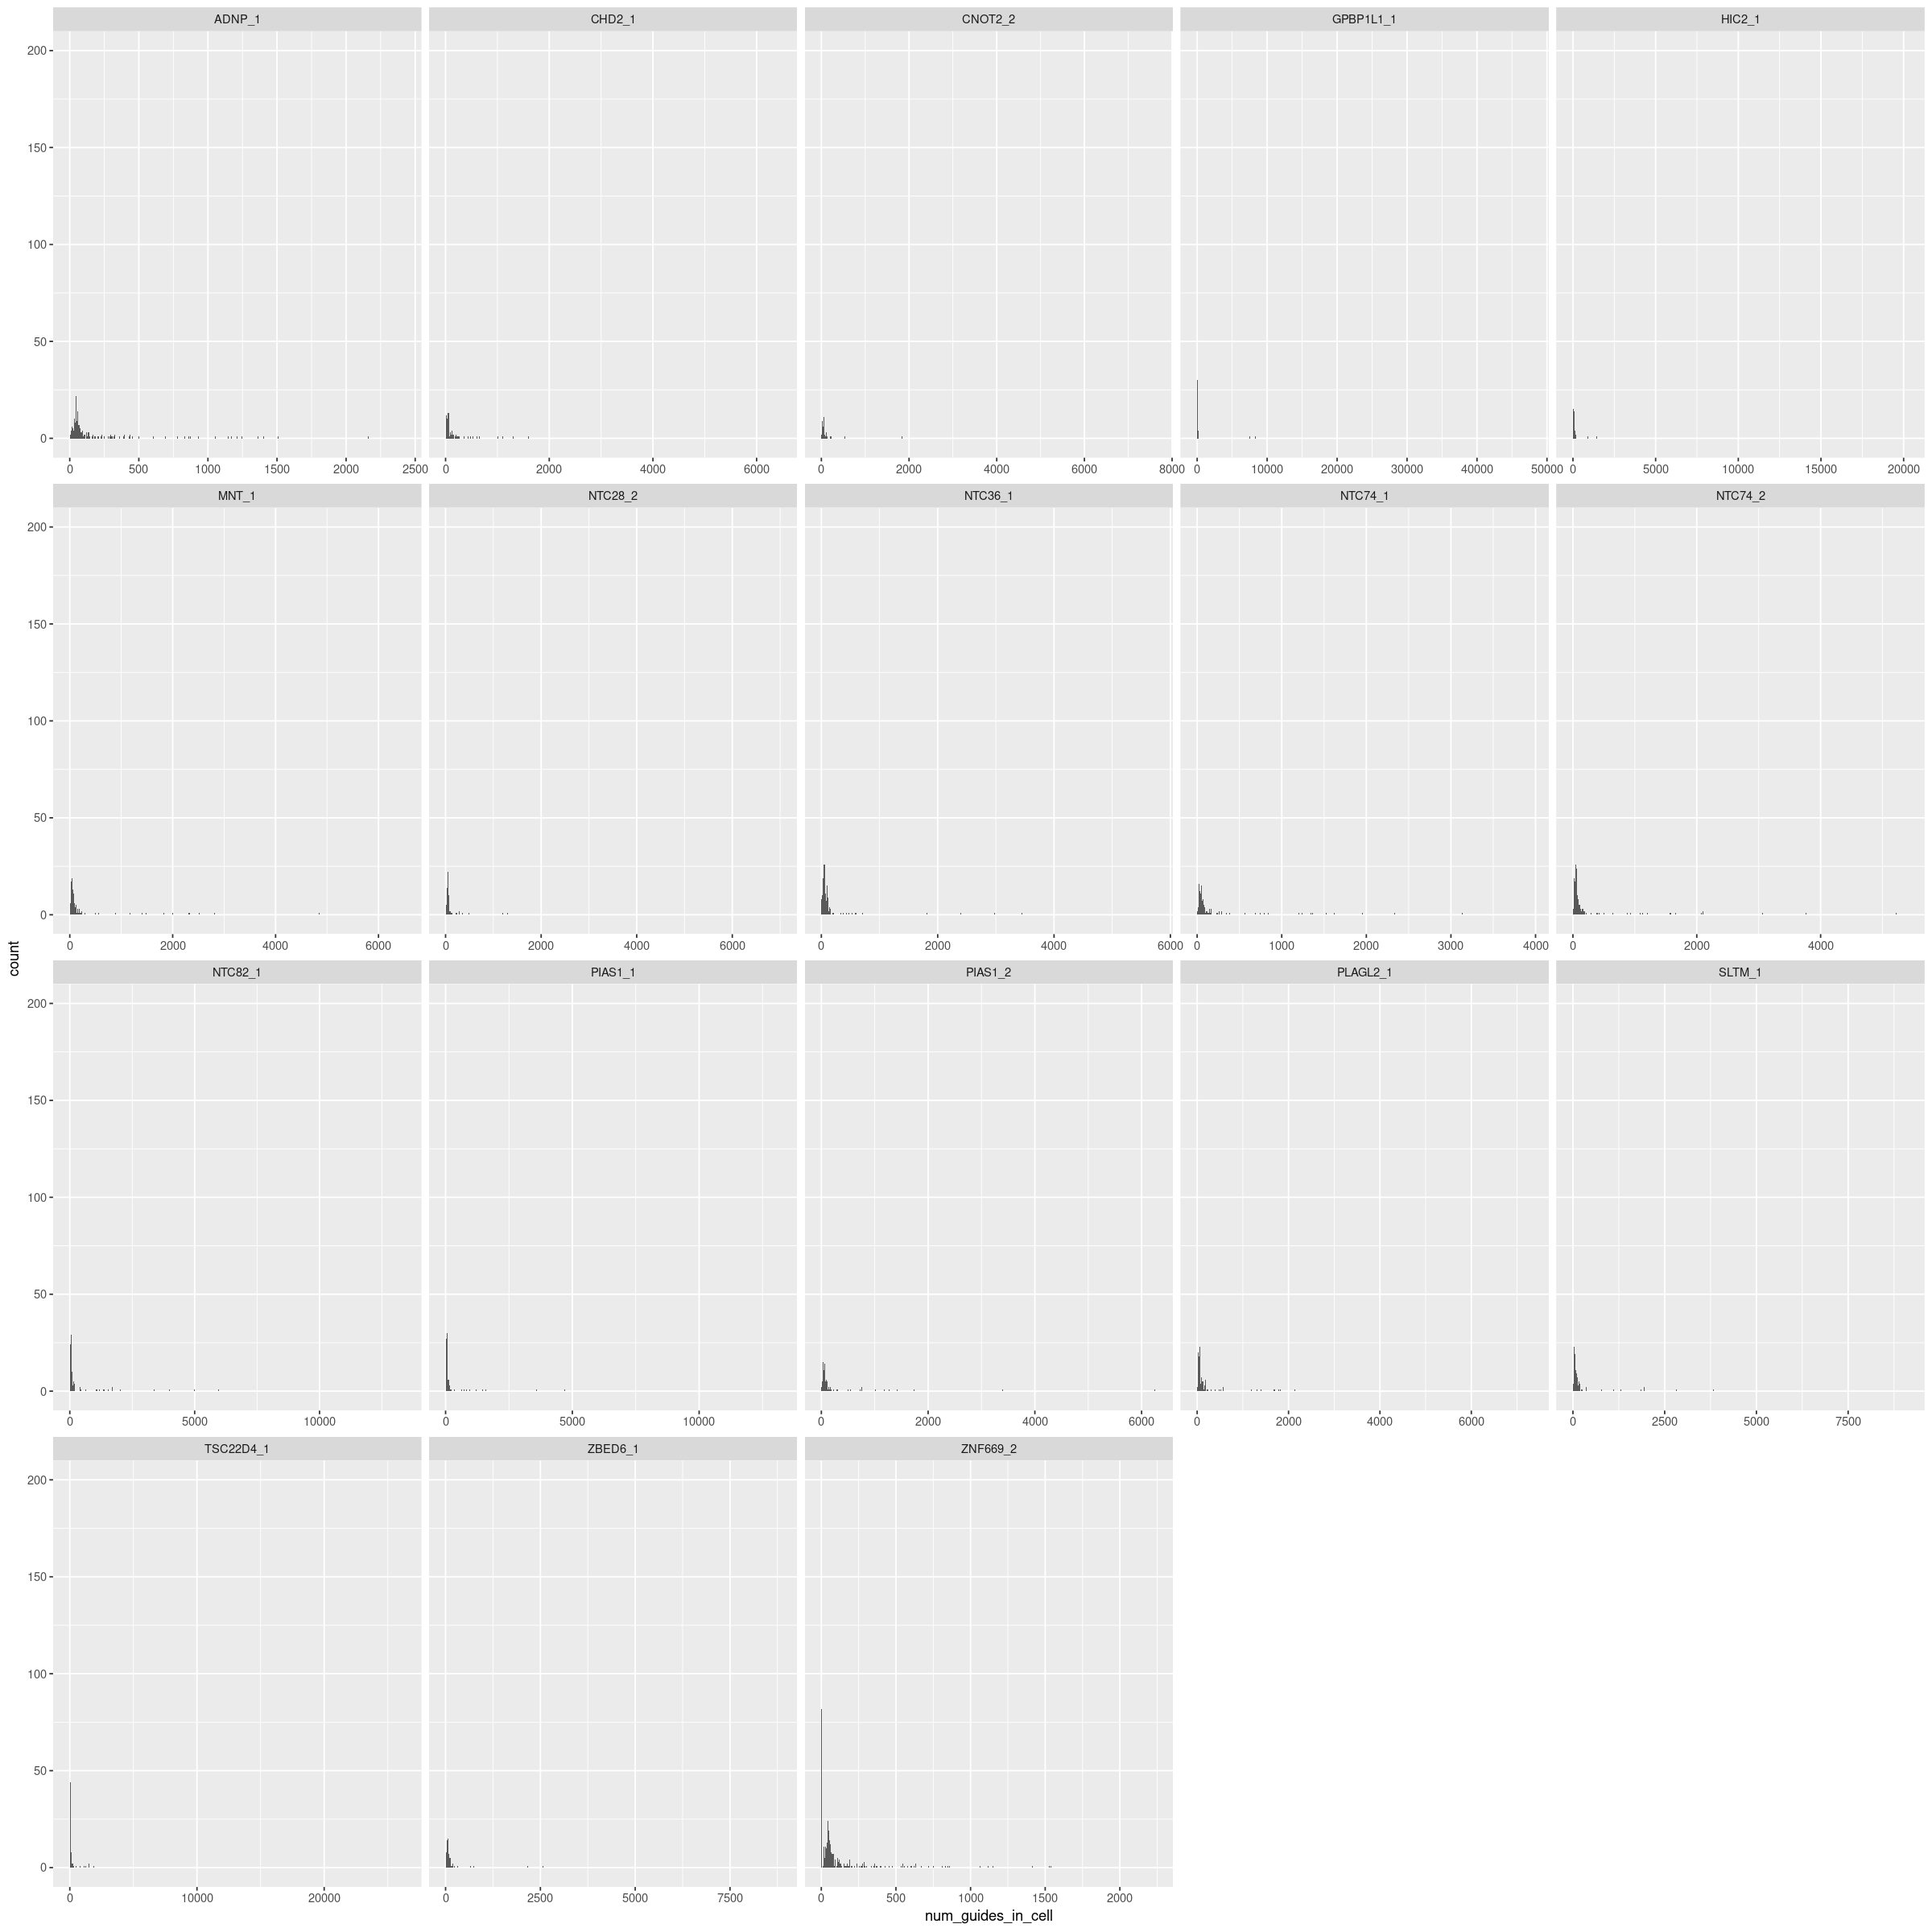

In [302]:
library(reshape2)
df_guide_counts_by_cell <- as.data.frame(t(overlapping_guide_counts))

d <- melt(df_guide_counts_by_cell)
d <- d[d$value > 0,]
colnames(d) = c("guide_name", "num_guides_in_cell")

options(repr.plot.width = 20, repr.plot.height = 20)
ggplot(d, aes(x = num_guides_in_cell)) + 
    facet_wrap(~guide_name, scales = "free_x") + 
    geom_histogram(binwidth=1) +
    labs(y_label="count") 

No id variables; using all as measure variables

Warning message in geom_histogram(bin_breaks = bin_breaks):
“Ignoring unknown parameters: `bin_breaks`”


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


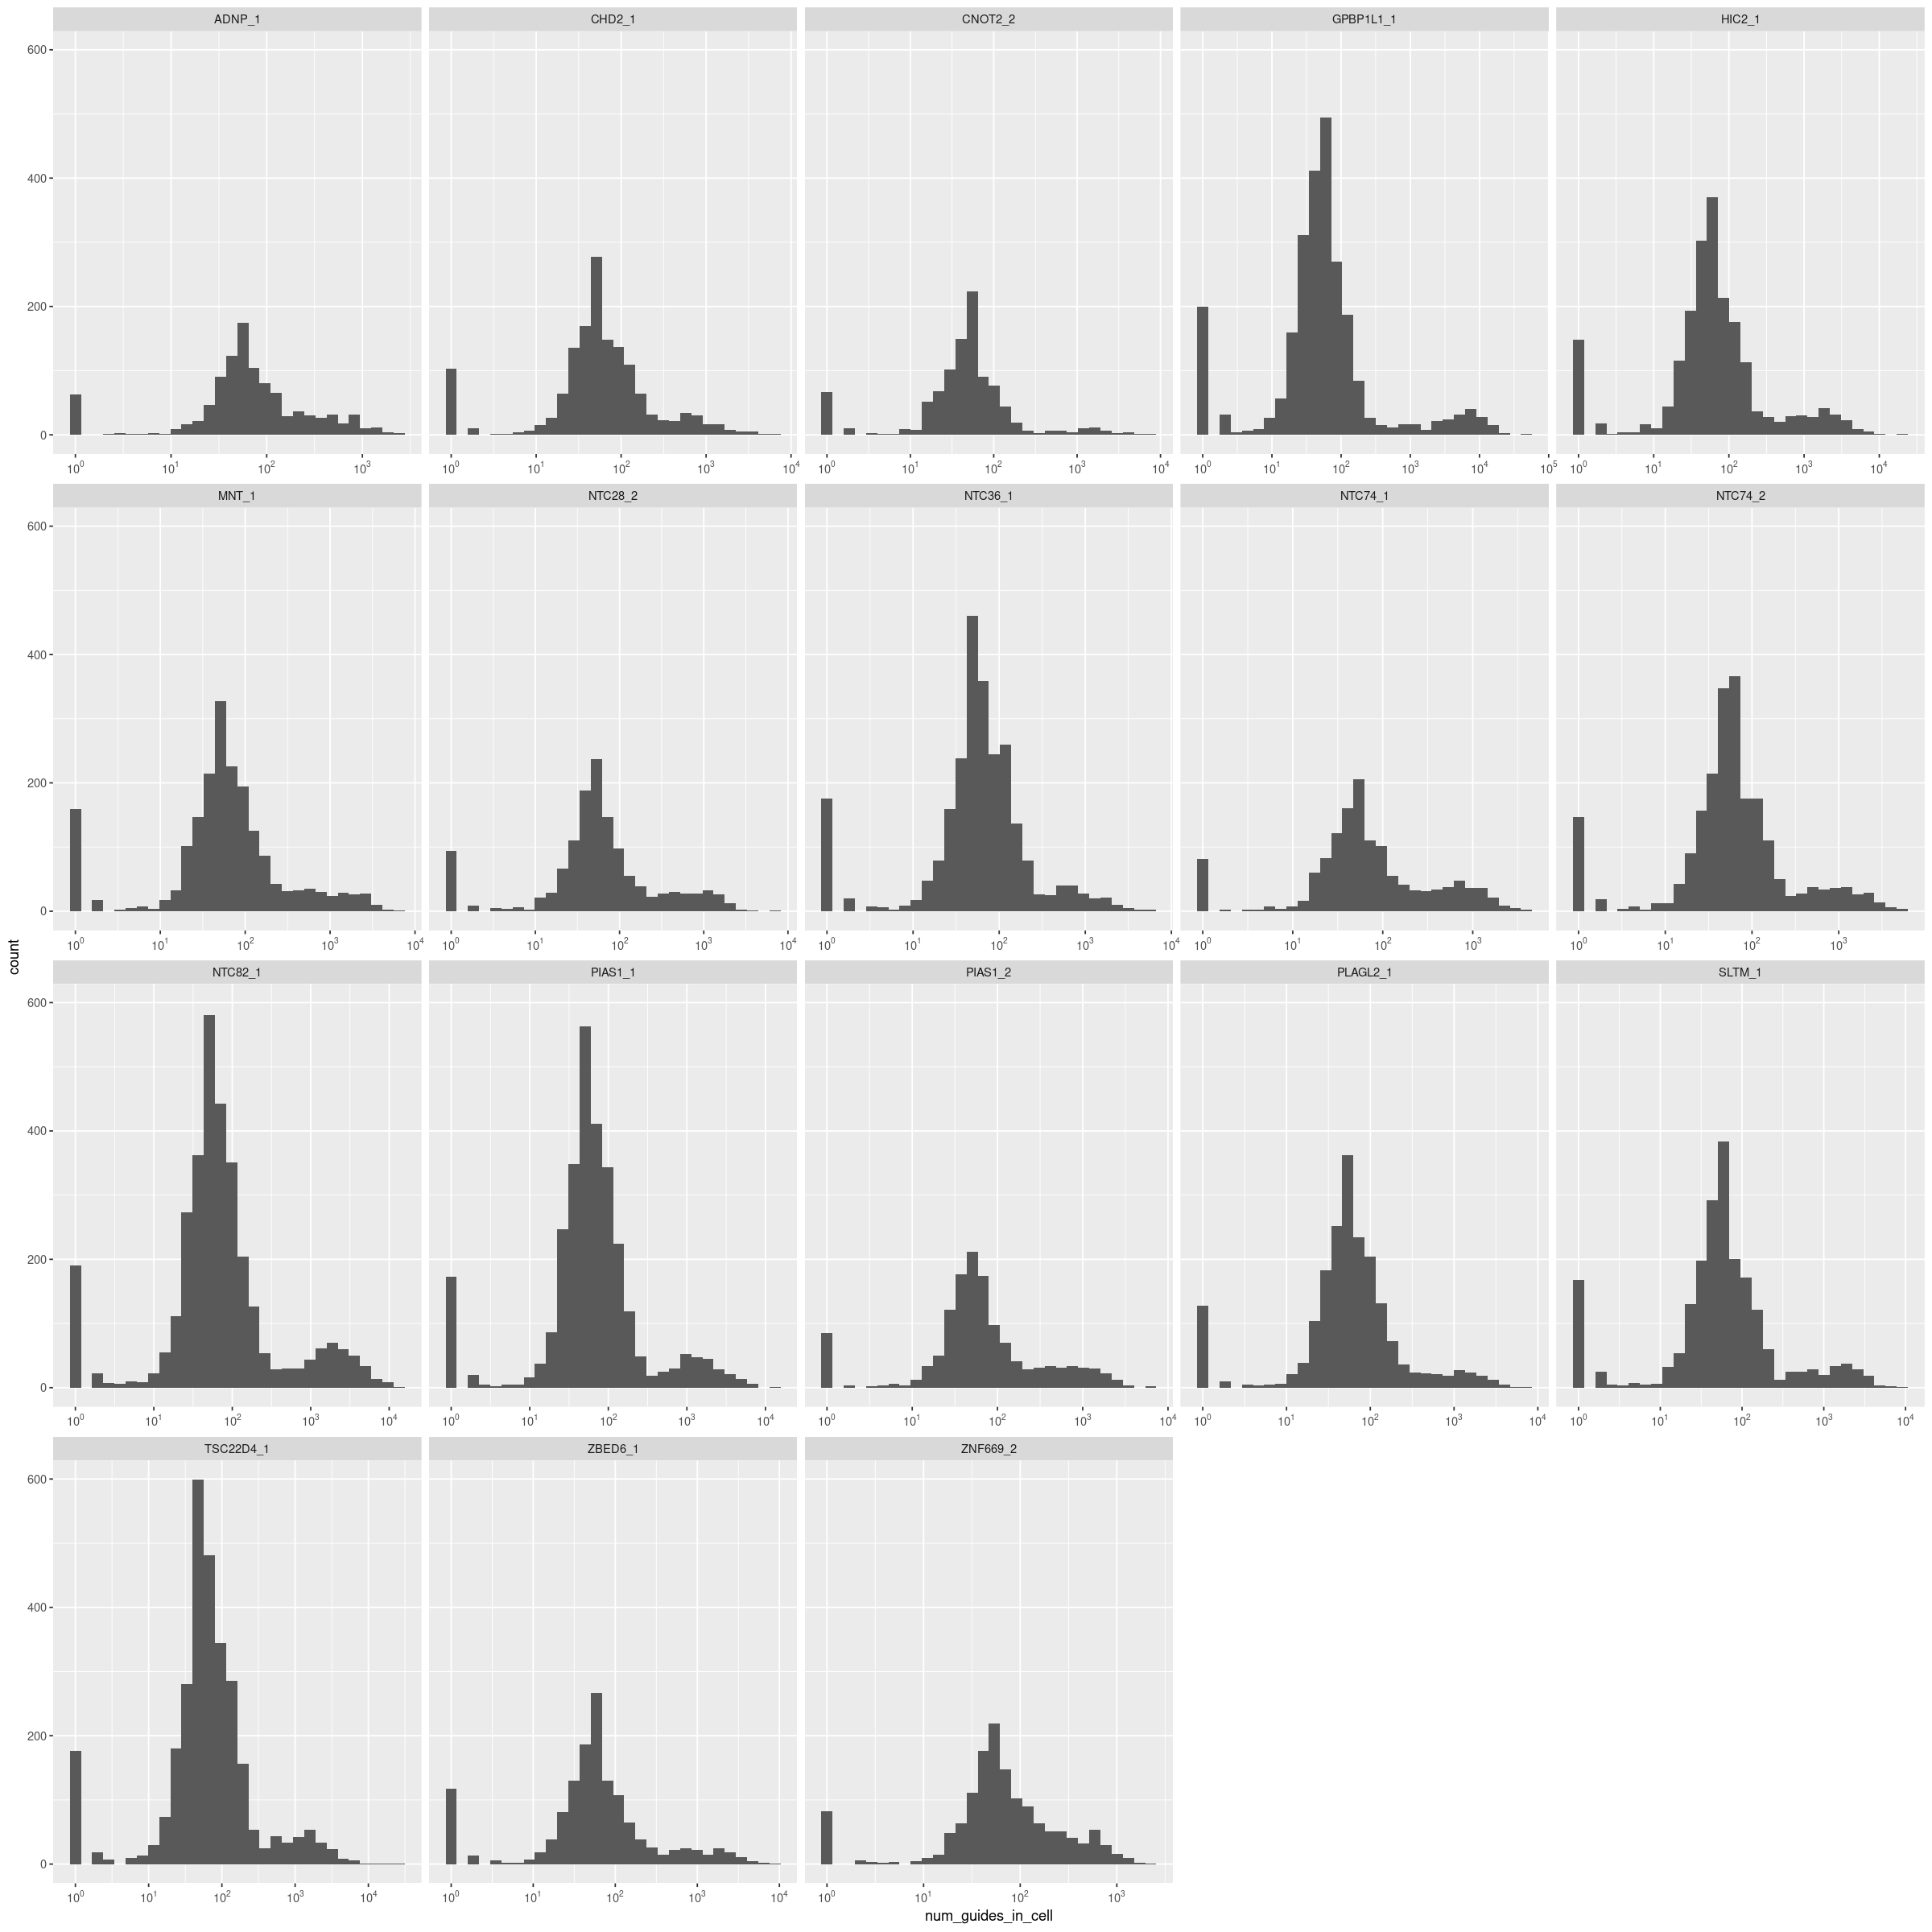

In [303]:
### Using log scales
library(reshape2)
library(scales)
df_guide_counts_by_cell <- as.data.frame(t(overlapping_guide_counts))

d <- melt(df_guide_counts_by_cell)
d <- d[d$value > 0,]
colnames(d) = c("guide_name", "num_guides_in_cell")

bin_breaks <- c(1,2,2*2^(1:16))

options(repr.plot.width = 20, repr.plot.height = 20)
ggplot(d, aes(x = num_guides_in_cell)) + 
    facet_wrap(~guide_name, scales = "free_x") + 
    geom_histogram(bin_breaks=bin_breaks) +
    scale_x_log10(labels=trans_format('log10',math_format(10^.x)), breaks=c(1,10,100,1000,10000,100000)) +
    labs(y_label="count") 

# Demux

Load multiome seurat object

In [304]:
if (!exists("seurat_all")) {
    seurat_all <- LoadH5Seurat(h5_name, verbose=FALSE)
}

In [305]:
# Select cells found in guide capture
seurat     <- subset(seurat_all, cells = overlapping_barcodes)
n_multiome <- length(Cells(seurat_all))

In [306]:
# Add guide data as a new assay independent from RNA & ATAC
seurat[["guidecapture"]] <- CreateAssayObject(counts = overlapping_guide_counts)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [307]:
# x <- GetAssayData(seurat, "counts")
# cells <- colnames(x[ , colSums(x) != 0])
# feats <- names((rowSums(x) != 0) == TRUE)
# seurat <- seurat[feats, cells] 

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [308]:
# Normalize guide data, here we use centered log-ratio (CLR) transformation
seurat <- NormalizeData(seurat, assay = "guidecapture", normalization.method = "CLR")

Normalizing across features



In [309]:
table(colSums(GetAssayData(seurat, assay = "guidecapture"))>10)


FALSE  TRUE 
 1731  5088 

In [310]:
# Calculate column sums for each gene in the RNA assay
gene_sums <- colSums(GetAssayData(seurat, assay = "guidecapture"))

# Identify genes with nonzero expression (sums greater than 0)
genes_with_expression <- gene_sums > 10

# Subset the Seurat object to retain only genes with nonzero expression
seurat <- seurat[, genes_with_expression]

In [311]:
table(colSums(GetAssayData(seurat, assay = "guidecapture")) >10)


TRUE 
5088 

In [312]:
seurat <- HTODemux(seurat, assay = "guidecapture", positive.quantile = 0.99, seed = 85253310)

Cutoff for ADNP-1 : 1 reads

Cutoff for CHD2-1 : 54 reads

Cutoff for CNOT2-2 : 181 reads

Cutoff for GPBP1L1-1 : 215 reads

Cutoff for HIC2-1 : 174 reads

Cutoff for MNT-1 : 260 reads

Cutoff for NTC28-2 : 81 reads

Cutoff for NTC36-1 : 291 reads

Cutoff for NTC74-1 : 81 reads

Cutoff for NTC74-2 : 203 reads

Cutoff for NTC82-1 : 297 reads

Cutoff for PIAS1-1 : 356 reads

Cutoff for PIAS1-2 : 142 reads

Cutoff for PLAGL2-1 : 309 reads

Cutoff for SLTM-1 : 205 reads

Cutoff for TSC22D4-1 : 435 reads

Cutoff for ZBED6-1 : 67 reads

Cutoff for ZNF669-2 : 178 reads



In [ ]:
unique(seurat$guidecapture_secondID)

# Visualize

In [ ]:
if (!exists("seurat")) {
    seurat <- LoadH5Seurat(h5_w_gcap_name)
}

In [ ]:
# Global classification results
n_cells <- length(seurat$guidecapture_classification.global)
demux_counts      <- table(seurat$guidecapture_classification.global)
demux_percentages <- round(demux_counts/n_cells, 2)

demux_counts
demux_percentages

n_doublets <- demux_counts[["Doublet"]]
n_singlets <- demux_counts[["Singlet"]]

capture_efficiency_1 <- 100*(n_doublets + n_singlets) / n_multiome
paste("Capture efficiency% = ", round(capture_efficiency_1), "( norm by", n_multiome, ")")

#capture_efficiency_2 <- 100 * (n_doublets + n_singlets) / n_all_overlapping
#paste("Capture efficiency%", round(capture_efficiency_2), "( norm by", n_all_overlapping, ")")

In [ ]:
length(Cells(seurat))

In [ ]:
# Group cells based on the max HTO signal
guide_names <- rownames(seurat[["guidecapture"]])
num_pcs     <- length(guide_names)

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 60)
tf_list <- tfs_to_plot

Idents(seurat) <- "guidecapture_classification"

RidgePlot(
    seurat,
    assay = "guidecapture",
    features = guide_names,
    slot="counts",
    ncol = 4
) + plot_annotation(title = "Raw guide counts") & theme(plot.title = element_text(hjust = 0.5, size = 20))

RidgePlot(
    seurat,
    assay = "guidecapture",
    features = guide_names,
    ncol = 4
) + plot_annotation(title = "Normalized guide counts") & theme(plot.title = element_text(hjust = 0.5, size = 20))

RidgePlot(
    seurat,
    assay = "SCT",
    features = tf_list,
    ncol = 4,
    y.max = .5
)+ plot_annotation(title = "Normalized transcript counts") & theme(plot.title = element_text(hjust = 0.5, size = 20))

In [ ]:
VlnPlot(
    seurat,
    assay = "guidecapture",
    features = guide_names,
    slot="counts",
    ncol = 4
) + plot_annotation(title = "Raw guide counts", 
                    theme = theme(plot.title = element_text(hjust = 0.5, size = 20)))


In [ ]:
# FeatureScatter(seurat, feature1 = "GATA5", feature2 = "MEOX1")
# FeatureScatter(seurat, feature1 = "GATA5", feature2 = "NEUROG2")
# FeatureScatter(seurat, feature1 = "MEOX1", feature2 = "NEUROG2")

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 8)
Idents(seurat) <- "guidecapture_classification.global"
VlnPlot(seurat, features = "nCount_RNA", pt.size = 0.1, log = TRUE)

In [ ]:
# First, we will remove negative cells from the object
seurat_subset <- subset(seurat, idents = "Negative", invert = TRUE)

# Calculate a tSNE embedding of the HTO data
DefaultAssay(seurat_subset) <- "guidecapture"

In [ ]:

seurat_subset <-
    ScaleData(seurat_subset, features = guide_names, verbose = FALSE)

# seurat_subset <- RunPCA(
#     seurat_subset,
#     npcs = num_pcs,
#     ndims.print = 1:num_pcs,
#     features = guide_names,
#     approx = FALSE
# )

# seurat_subset <-
#     RunTSNE(
#         seurat_subset,
#         dims = 1:num_pcs,
#         perplexity = 100,
#         check_duplicates = FALSE
#     )

# seurat_subset <-
#     RunUMAP(seurat_subset, dims = 1:num_pcs)

#DimPlot(seurat_subset, reduction = "tsne")

In [ ]:
HTOHeatmap(seurat, assay = "guidecapture")

In [ ]:
SaveH5Seurat(seurat, h5_w_gcap_name, overwrite = TRUE, verbose = FALSE)

# Inspect results

In [ ]:
# Label each cell with the number of guides detected in it by HTOdemux
seurat$perturb_targets_detected_in_cell <- colSums(sapply(seurat$guidecapture_classification, str_detect, tfs_w_ntctl))

In [ ]:
# Split the surat obj into singlets, doublets, negatives
# Singlets have only one target gene detected, but can have both guides targeting it.
seurat_negatives <- subset(seurat, idents = "Negative")
seurat_singlets  <- subset(seurat, perturb_targets_detected_in_cell == 1)
seurat_doublets  <- subset(seurat, perturb_targets_detected_in_cell > 1)

In [ ]:
# Assign the target gene name to singlets
x <- seurat_singlets$guidecapture_classification
target_assignments = sapply(tfs_w_ntctl, function(y) grep(y,x))

empty_vec = vector("character", length(x))
for(tf in names(target_assignments)) {
    indexes = target_assignments[[tf]]
    empty_vec[indexes] = tf
}

In [ ]:
Idents(seurat_singlets) <- empty_vec
Idents(seurat_doublets) <- seurat_doublets@meta.data$guidecapture_classification

### Singlets

In [ ]:
singlet_barcodes <- Cells(seurat_singlets)
select_singlets  <- df_guide$barcode_dash %in% singlet_barcodes
df_singlets      <- df_guide[select_singlets, ]

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 6)

plot_n_guides <- ggplot(df_singlets, aes(x = n_guides)) +
    geom_histogram(binwidth = 1) +
    labs(title = "Singlets, guide counts", x = "#guides captured") +
    labs(y = "#cells")

plot_dominant <- ggplot(df_singlets, aes(x = percent_dominant_gene)) +
    geom_histogram(binwidth = 1) +
    labs(title = "Singlets, %dominant gene", x = "%dominant gene") +
    labs(y = "#cells")

plot_n_guides | plot_dominant

### Negatives

In [ ]:
negative_barcodes <- Cells(seurat_negatives)
select_negatives  <- df_guide$barcode_dash %in% negative_barcodes
df_negatives      <- df_guide[select_negatives, ]

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 6)

plot_n_guides <- ggplot(df_negatives, aes(x = n_guides)) +
    geom_histogram(binwidth = 1) +
    labs(title = "Negatives, guide counts", x = "#guides captured") +
    labs(y = "#cells")

plot_dominant <- ggplot(df_negatives, aes(x = percent_dominant_gene)) +
    geom_histogram(binwidth = 1) +
    labs(title = "Negatives, %dominant gene", x = "%dominant gene") +
    labs(y = "#cells")

plot_n_guides | plot_dominant

In [ ]:
sample_n(df_negatives, 10)

In [ ]:
#hist(df_singlets$GATA5)

In [ ]:
library(cluster)
library(fitdistrplus)

MaxN <- function(x, N = 2){
  len <- length(x)
  if (N > len) {
    warning('N greater than length(x).  Setting N=length(x)')
    N <- length(x)
  }
  sort(x, partial = len - N + 1)[len - N + 1]
}

myHTODemux <- function(
  object,
  assay = "HTO",
  positive.quantile = 0.99,
  init = NULL,
  nstarts = 100,
  kfunc = "clara",
  nsamples = 100,
  seed = 42,
  verbose = TRUE
) {
  if (!is.null(x = seed)) {
    set.seed(seed = seed)
  }
  #initial clustering
  assay <- assay %||% DefaultAssay(object = object)
  data <- GetAssayData(object = object, assay = assay)
  counts <- GetAssayData(
    object = object,
    assay = assay,
    slot = 'counts'
  )[, colnames(x = object)]
  counts <- as.matrix(x = counts)
  ncenters <- init %||% (nrow(x = data) + 1)
  switch(
    EXPR = kfunc,
    'kmeans' = {
      init.clusters <- kmeans(
        x = t(x = GetAssayData(object = object, assay = assay)),
        centers = ncenters,
        nstart = nstarts
      )
      #identify positive and negative signals for all HTO
      Idents(object = object, cells = names(x = init.clusters$cluster)) <- init.clusters$cluster
    },
    'clara' = {
      #use fast k-medoid clustering
      init.clusters <- clara(
        x = t(x = GetAssayData(object = object, assay = assay)),
        k = ncenters,
        samples = nsamples
      )
      #identify positive and negative signals for all HTO
      Idents(object = object, cells = names(x = init.clusters$clustering), drop = TRUE) <- init.clusters$clustering
    },
    stop("Unknown k-means function ", kfunc, ", please choose from 'kmeans' or 'clara'")
  )
  #average hto signals per cluster
  #work around so we don't average all the RNA levels which takes time
  average.expression <- AverageExpression(
    object = object,
    assays = assay,
    verbose = FALSE
  )[[assay]]
  #checking for any cluster with all zero counts for any barcode
  if (sum(average.expression == 0) > 0) {
    stop("Cells with zero counts exist as a cluster.")
  }
  #create a matrix to store classification result
  discrete <- GetAssayData(object = object, assay = assay)
  discrete[discrete > 0] <- 0
  # for each HTO, we will use the minimum cluster for fitting
  for (iter in rownames(x = data)) {
    values <- counts[iter, colnames(object)]
    #commented out if we take all but the top cluster as background
    #values_negative=values[setdiff(object@cell.names,WhichCells(object,which.max(average.expression[iter,])))]
    values.use <- values[WhichCells(
      object = object,
      idents = levels(x = Idents(object = object))[[which.min(x = average.expression[iter, ])]]
    )]
    fit <- suppressWarnings(expr = fitdist(data = values.use, distr = "nbinom"))
    cutoff <- as.numeric(x = quantile(x = fit, probs = positive.quantile)$quantiles[1])
    discrete[iter, names(x = which(x = values > cutoff))] <- 1
    if (verbose) {
      message(paste0("Cutoff for ", iter, " : ", cutoff, " reads"))
    }
  }
  # now assign cells to HTO based on discretized values
  npositive <- colSums(x = discrete)
  classification.global <- npositive
  classification.global[npositive == 0] <- "Negative"
  classification.global[npositive == 1] <- "Singlet"
  classification.global[npositive > 1] <- "Doublet"
  donor.id = rownames(x = data)
  hash.max <- apply(X = data, MARGIN = 2, FUN = max)
  hash.maxID <- apply(X = data, MARGIN = 2, FUN = which.max)
  hash.second <- apply(X = data, MARGIN = 2, FUN = MaxN, N = 2)
  hash.maxID <- as.character(x = donor.id[sapply(
    X = 1:ncol(x = data),
    FUN = function(x) {
      return(which(x = data[, x] == hash.max[x])[1])
    }
  )])
  hash.secondID <- as.character(x = donor.id[sapply(
    X = 1:ncol(x = data),
    FUN = function(x) {
      return(which(x = data[, x] == hash.second[x])[1])
    }
  )])
  hash.margin <- hash.max - hash.second
  doublet_id <- sapply(
    X = 1:length(x = hash.maxID),
    FUN = function(x) {
      return(paste(sort(x = c(hash.maxID[x], hash.secondID[x])), collapse = "_"))
    }
  )
  # doublet_names <- names(x = table(doublet_id))[-1] # Not used
  classification <- classification.global
  classification[classification.global == "Negative"] <- "Negative"
  classification[classification.global == "Singlet"] <- hash.maxID[which(x = classification.global == "Singlet")]
  classification[classification.global == "Doublet"] <- doublet_id[which(x = classification.global == "Doublet")]
  classification.metadata <- data.frame(
    hash.maxID,
    hash.secondID,
    hash.margin,
    classification,
    classification.global
  )
  colnames(x = classification.metadata) <- paste(
    assay,
    c('maxID', 'secondID', 'margin', 'classification', 'classification.global'),
    sep = '_'
  )
  object <- AddMetaData(object = object, metadata = classification.metadata)
  Idents(object) <- paste0(assay, '_classification')
  # Idents(object, cells = rownames(object@meta.data[object@meta.data$classification.global == "Doublet", ])) <- "Doublet"
  doublets <- rownames(x = object[[]])[which(object[[paste0(assay, "_classification.global")]] == "Doublet")]
  Idents(object = object, cells = doublets) <- 'Doublet'
  # object@meta.data$hash.ID <- Idents(object)
  object$hash.ID <- Idents(object = object)
  return(discrete)
}


In [ ]:
seurat_alt <- subset(seurat, cells = Cells(seurat))
disc <- myHTODemux(seurat_alt, assay = "guidecapture", positive.quantile = 0.99)

# Visualize guides by clusters

## Singlets only

In [ ]:
options(repr.plot.width = 23, repr.plot.height = 8)
#Idents(seurat_singlets) <- seurat_singlets@meta.data$guidecapture_classification

p1 <- DimPlot(seurat_singlets, reduction = "umap.rna", label = TRUE, label.size = 6, repel = TRUE) + ggtitle("RNA")
p2 <- DimPlot(seurat_singlets, reduction = "umap.atac", label = TRUE, label.size = 6, repel = TRUE) + ggtitle("ATAC")
p3 <- DimPlot(seurat_singlets, reduction = "wnn.umap", label = TRUE, label.size = 6, repel = TRUE) + ggtitle("WNN")
p1 + p2 + p3 & plot_annotation(title = "Guide Capture, singlets") & 
theme(plot.title = element_text(hjust = 0.5, size = 20)) +
theme(axis.title = element_text(size = 18))   

In [ ]:
options(repr.plot.width = 70, repr.plot.height = 20)
p1 <- DimPlot(seurat_doublets, reduction = "umap.rna", label = FALSE, label.size = 6) + ggtitle("RNA")
p2 <- DimPlot(seurat_doublets, reduction = "umap.atac", label = FALSE, label.size = 6) + ggtitle("ATAC")
p1 + p2 & plot_annotation(title = "Guide Capture, doublets") &
theme(plot.title = element_text(hjust = 0.5, size = 20))

#p3 <- DimPlot(seurat_doublets, reduction = "wnn.umap", label = TRUE, label.size = 6, repel = TRUE) + ggtitle("WNN")

In [ ]:
options(repr.plot.width = 54, repr.plot.height = 45)
tf_list <- tfs_to_plot

FeaturePlot(
    seurat_singlets,
    features = tf_list, 
    split.by = 'ident', 
    reduction = 'umap.rna', 
    cols = c("grey", "red"),
    keep.scale = "feature"
)

In [ ]:
options(repr.plot.width = 36, repr.plot.height = 12)
guide_list <- gsub("_", "-", guides_to_plot)
DefaultAssay(seurat_singlets) <- "guidecapture"

FeaturePlot(
    seurat_singlets,
    features = guide_list,
    reduction = 'umap.rna',
    cols = c("grey", "red"),
    keep.scale = "feature",
    ncol = length(guide_list)/2
) +
plot_annotation(title = "Guide Capture, singlets") &
theme(plot.title = element_text(hjust = 0.5, size = 20))

options(repr.plot.width = 50, repr.plot.height = 6)
tf_list <- c(tfs_to_plot, "POU5F1")
DefaultAssay(seurat_singlets) <- "SCT"
FeaturePlot(
    seurat_singlets,
    features = tf_list,
    reduction = 'umap.rna',
    cols = c("grey", "red"),
    keep.scale = "feature",
    ncol = length(tf_list)
) +
plot_annotation(title = "RNA, singlets") &
theme(plot.title = element_text(hjust = 0.5, size = 20))



In [ ]:
tfs_to_plot

In [ ]:
library(patchwork)
options(repr.plot.width = 32, repr.plot.height = 12)
tf_list <- tfs_to_plot
guide_list <- gsub("_", "-", guides_to_plot)

DefaultAssay(seurat_singlets) <- "guidecapture"
FeaturePlot(
    seurat_singlets,
    features = guide_list,
    reduction = 'umap.atac',
    cols = c("grey", "red"),
    keep.scale = "all",
    ncol = length(guide_list)/2
) +
plot_annotation(title = "Guide Capture") &
theme(plot.title = element_text(hjust = 0.5, size = 20))

FeaturePlot(
    seurat_singlets,
    features =guide_list,
    reduction = 'umap.rna',
    cols = c("grey", "red"),
    keep.scale = "all",
    ncol = length(guide_list)/2
) +
plot_annotation(title = "Guide Capture") &
theme(plot.title = element_text(hjust = 0.5, size = 20))

FeaturePlot(
    seurat_singlets,
    features = guide_list,
    reduction = 'wnn.umap',
    cols = c("grey", "red"),
    keep.scale = "all",
    ncol = length(guide_list)/2
) +
plot_annotation(title = "Guide Capture") &
theme(plot.title = element_text(hjust = 0.5, size = 20))



In [ ]:

options(repr.plot.width = 50, repr.plot.height = 12)
tf_list <- tfs_to_plot
DefaultAssay(seurat_singlets) <- "SCT"

FeaturePlot(
    seurat_singlets,
    features = tf_list,
    reduction = 'umap.rna',
    cols = c("grey", "red"),
    keep.scale = "all",
    ncol = length(tf_list)
) +
plot_annotation(title = "RNA") &
theme(plot.title = element_text(hjust = 0.5, size = 20))

FeaturePlot(
    seurat_singlets,
    features = tf_list,
    reduction = 'umap.atac',
    cols = c("grey", "red"),
    keep.scale = "all",
    ncol = length(tf_list)
) +
plot_annotation(title = "RNA") &
theme(plot.title = element_text(hjust = 0.5, size = 20))

FeaturePlot(
    seurat_singlets,
    features = tf_list,
    reduction = 'wnn.umap',
    cols = c("grey", "red"),
    keep.scale = "all",
    ncol = length(tf_list)
) +
plot_annotation(title = "RNA") &
theme(plot.title = element_text(hjust = 0.5, size = 20))

## Doublets only

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)

Idents(seurat_doublets) <- seurat_doublets@meta.data$guidecapture_classification

plot <- DimPlot(
    seurat_doublets,
    reduction = "umap.rna"
)
LabelClusters(
    plot = plot,
    id = "ident"
)

In [ ]:
# options(repr.plot.width = 48, repr.plot.height = 15)
# tf_list <- tfs_to_plot
# DefaultAssay(seurat_singlets) <- "SCT"

# FeaturePlot(
#     seurat_doublets,
#     features = tf_list, 
#     split.by = 'ident', 
#     reduction = 'umap.rna', 
#     cols = c("grey", "red"),
#     keep.scale = "all"
# )

# Get cell counts in clusters

In [ ]:
Assays(seurat_singlets)

In [ ]:

DefaultAssay(seurat_singlets) <- "RNA"
seurat_singlets@meta.data$seurat_clusters
seurat_singlets <- StashIdent(seurat_singlets, save.name = "current.ident")

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 8)
seurat_singlets <- SetIdent(seurat_singlets, value = seurat_singlets@meta.data$seurat_clusters)
DimPlot(seurat_singlets, reduction = 'umap.rna', label = TRUE)

In [ ]:
cluster_counts <- table(Idents(seurat_singlets))
as.data.frame(cluster_counts)


In [ ]:
#cluster_counts[['2']] + cluster_counts[['5']] + cluster_counts[['11']] + cluster_counts[['13']] + cluster_counts[['14']]

In [ ]:
DefaultAssay(seurat_singlets) <- "guidecapture"
Idents(seurat_singlets) <- "guidecapture_classification"

In [ ]:
# seurat_ngn2 <- subset(seurat_singlets, idents = tfs_w_ntctl[1])
# hist(seurat_ngn2@meta.data$SCT.weight)

In [ ]:
#hist(seurat_ngn2$SCT@data[tfs_w_ntctl[1],])

In [ ]:
Idents(seurat_singlets) <- "guidecapture_classification"
options(repr.plot.width = 30, repr.plot.height = 10)
tf_list <- tfs_to_plot

Idents(seurat) <- "guidecapture_classification"
RidgePlot(
    seurat_singlets,
    assay = "guidecapture",
    features = guide_names,
    ncol = 4
) +
plot_annotation(title = "Guide capture, singlets") &
theme(plot.title = element_text(hjust = 0.5, size = 20))


RidgePlot(
    seurat_singlets,
    assay = "SCT",
    features = tf_list,
    ncol = 4,
) +
plot_annotation(title = "Gene expression, singlets") &
theme(plot.title = element_text(hjust = 0.5, size = 20))


# How many singlets express both Protospacer1 and 2?

In [ ]:
singlet_barcodes <- Cells(seurat_singlets)

In [ ]:
select_singlets <- df_guide$barcode_dash %in% singlet_barcodes
df_singlets     <- df_guide[select_singlets,]

In [ ]:
singlets_metadata <- seurat_singlets@meta.data['guidecapture_classification']
singlets_metadata['barcode_dash'] <- rownames(singlets_metadata)
head(singlets_metadata)

In [ ]:
df_singlets <- merge(df_singlets, singlets_metadata, by = "barcode_dash")

In [ ]:
head(df_singlets)

In [ ]:
# # Count the singlets where both PSs are captured

# fracs_list <- list()
# guide_list <- c("NEUROG2", "MEOX1", "GATA5", "NTCTL")
# ps_list <- list(
#             'NEUROG2_pss' = c("NEUROG2_1", "NEUROG2_2"),
#             'MEOX1_pss' = c("MEOX1_1", "MEOX1_2"),
#             'GATA5_pss' = c("GATA5_1", "GATA5_2"),
#             'NTCTL_pss' = c("NTCTL_1", "NTCTL_2")
#         )

# for(guide in guide_list) {
#     ps_col_names <- c(paste0(guide, "_1"), paste0(guide, "_2"))
#     select_guide <- df_singlets$guidecapture_classification == guide
    
#     for(ps_pair in names(ps_list)){ 
#         ps_col_names <- ps_list[[ps_pair]]
#         df_dummy <- df_singlets[select_guide, ps_col_names]    
#         both_ps_captured <- (df_dummy[,1] > 0) & (df_dummy[,2] > 0)
#         frac_dual_ps <- round(sum(both_ps_captured)/nrow(df_dummy),2)
#         #print(paste(guide, ps_pair, frac_dual_ps))
#         fracs_list <- rbind(fracs_list, list(guide, ps_pair, frac_dual_ps))
#     }

    
# }

In [ ]:
# For singlets
# V1 is assigned barcode
# V2 is the name of the gene/guide where both protospacers are detected in barcode
# V3 is the fraction of barcodes with the both protospacers of gene/guide in V2 

# as.data.frame(fracs_list)